In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# To display stats of data
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
# To display basic info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
# to display no. of count of samples on each class
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

# Preprocessing the Dataset


In [12]:
# check for null values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# Exploratory Dataset

## Histograms

<AxesSubplot:>

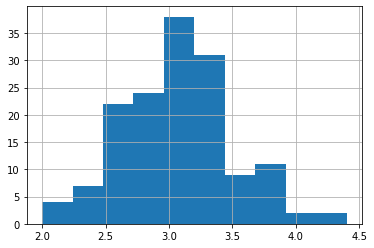

In [13]:
df['sepal_width'].hist()

<AxesSubplot:>

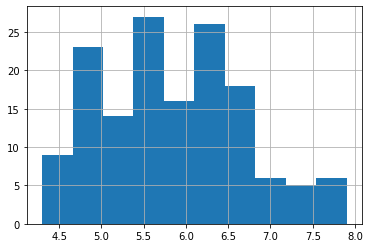

In [14]:
df['sepal_length'].hist()

<AxesSubplot:>

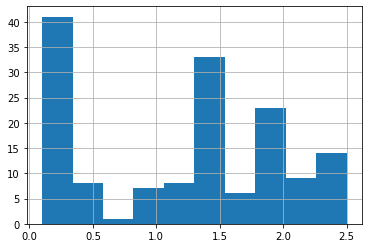

In [15]:
df['petal_width'].hist()

<AxesSubplot:>

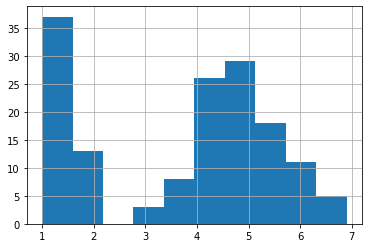

In [17]:
df['petal_length'].hist()

## Scatter_Plots

In [18]:
colors = ['green','cyan','orange']
species = ['Iris-setosa','Iris-versicolor','Iris-virginica' ]

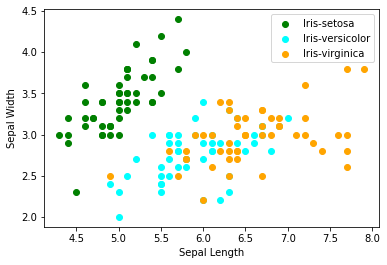

In [20]:
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['sepal_length'],x['sepal_width'], c = colors[i], label = species[i])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()

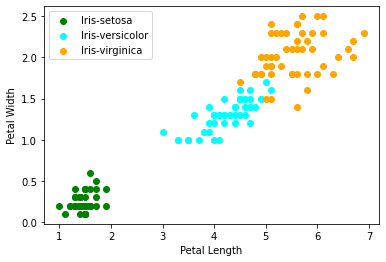

In [21]:
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['petal_length'],x['petal_width'], c = colors[i], label = species[i])
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()

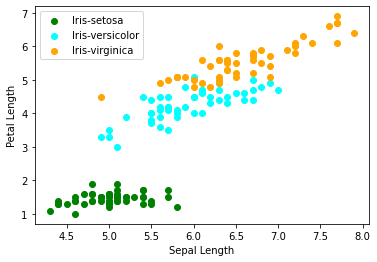

In [22]:
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['sepal_length'],x['petal_length'], c = colors[i], label = species[i])
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.legend()

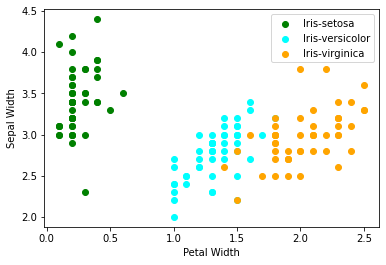

In [23]:
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['petal_width'],x['sepal_width'], c = colors[i], label = species[i])
plt.xlabel('Petal Width')
plt.ylabel('Sepal Width')
plt.legend()

# Coorelation Matrix

<AxesSubplot:>

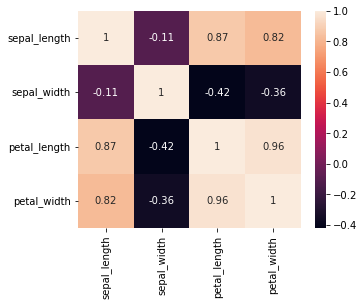

In [29]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr,annot = True , ax=ax)

# Label Encoder

In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [33]:
df['species'] = le.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Model Training


In [63]:
from sklearn.model_selection import train_test_split
# train - 60
# test - 40
X = df.drop(columns = ['species'])
Y = df['species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.40)


### Logistic Regression


In [64]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [65]:
# model training
model.fit(x_train, y_train)

LogisticRegression()

##### Print Metric to check Performance

In [66]:
print('Accuracy :',model.score(x_test, y_test)*100)

Accuracy : 95.0


### knn - k-Nearest Neighbours 

In [67]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()


In [68]:
model.fit(x_train, y_train)

KNeighborsClassifier()

In [69]:
print('Accuracy :',model.score(x_test, y_test)*100)


Accuracy : 95.0


### Decision Tree Classifier


In [70]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()


In [71]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [72]:
print('Accuracy :',model.score(x_test, y_test)*100)


Accuracy : 93.33333333333333
